# Deep Learning 3 - Time to exercise with Keras

In the previous notebooks, I focused more on the ideas and theories behind this deep neural network. My aim is in this notebook to use Keras to practice the neural networks that I have implemented previously. I will start with Fashion MNIST dataset and I don't have a particular plan about the exercises that I will try but we'll see.

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

## Hello World of Deep Learning Fashion MNIST dataset

Firstly, let's load our dataset and split it into train and test sets.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

I'm planning to use two different models on that dataset. In the first one, I will be using Sequential API and in the second one I will use Functional API. I aim to have %90 accuracy on validation set in both of the models. I will not use any hyperparameters tuning and regularization in these models because I would like to use them after I made a notebook about the implementation of these initialization, regularization and optimization techniques from scratch as I did in ANDREW NG's course.

### Sequential Model

Firstly, I want to see whether or not the target variable is skewed. If It was I would use `class_weight` argument while calling the `fit()` function which would give a larger priority (actually weight) to  underrepresented classes and lower to overrepresented ones. So we would get a higher weight while computing the cost function and this would help us to get a better classifier for all the labels. It may be also good to use `sample_weight` argument in these cases which gives more priority to some samples. There is a nice stackoverflow discussion about that the difference between sample_weight and class_weight [link](https://stackoverflow.com/questions/32492550/what-is-the-difference-between-sample-weight-and-class-weight-options-in-scikit)

Addition1: we can also add sample_weight to validation_data while compiling.


C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

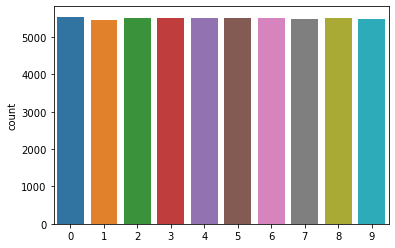

In [108]:
sns.countplot(y_train)

Okay now let's start constructing our model. I will start with a flatten layer, I guess I have talked about the function `Flatten()`  in my previous notebooks but to revise it, It converts each input into a one-dimensional array. It basically does `.reshape(-1,1)`. I will also set the `input_shape()`. Then in the following layers I simply used ReLU activation function and in the last node since we have 10 different outputs, I will use softmax activation function. Documentation for activation functions: [link](https://keras.io/initializers/.)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(260, activation="relu"))
model.add(keras.layers.Dense(140, activation="relu"))
model.add(keras.layers.Dense(90, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

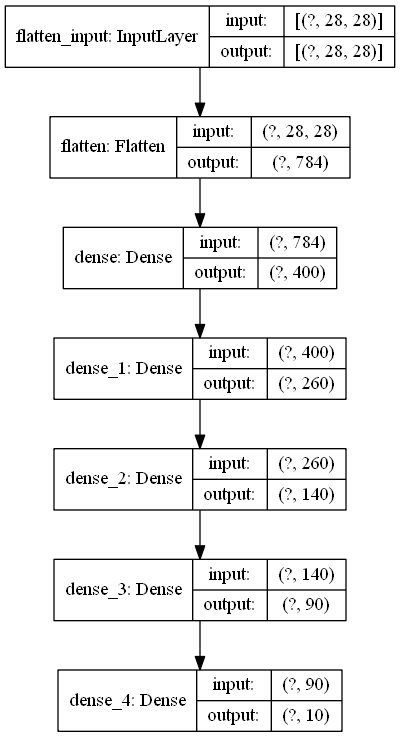

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In my previous notebook I initialized the weights randomly in addition to initializing the bias as 0. In fact the `Dense()` function does this automatically.

In [7]:
hdn_lyr1 = model.layers[1]
weights, biases = hdn_lyr1.get_weights()

In [8]:
weights

array([[ 0.0514607 ,  0.01438598, -0.04673972, ...,  0.04065529,
        -0.0423982 ,  0.02460463],
       [ 0.02134651,  0.01446612,  0.01129872, ..., -0.01284081,
         0.00035759,  0.06763688],
       [-0.03797506,  0.0047066 , -0.06346311, ...,  0.05471922,
         0.05463848, -0.0258562 ],
       ...,
       [-0.02959318,  0.06238516, -0.03147805, ...,  0.03985156,
        -0.02314321, -0.04266967],
       [ 0.01027863,  0.05750225, -0.05942551, ...,  0.01131304,
         0.02868841,  0.00826363],
       [ 0.06365559, -0.03826068, -0.04590683, ..., -0.05463227,
         0.03345894, -0.07021318]], dtype=float32)

In [9]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

The difference here is that in the previous notebook I didn't set the `input_shape` while structuring my model. The weight shape is actually depends on the `input_shape`, that's why, If we don't set input_shape as above the algorithm will wait until we compile our model to get the input_shape as well as weight_shape. Delete the input_shape argument above and you will not be able to get the weights values until you compile the model. Initialization is an important step to break symmetry and I will revise it again in the following notebooks. Documentation for initializers : [link](https://keras.io/initializers/.)

In [10]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),# default learning_rate is 0.01
              metrics=[keras.metrics.sparse_categorical_accuracy])

Here we will have sparse labels. For every instance we will have array that shows probability of being one of the cloths which will look something like this [0, 0.3, 0, 0, 0, 0,2 ,0.9 ,0 ,0 ]. In other words, when we have more than one two labels we can use ` loss="sparse_categorical_crossentropy"`. If there was one target we could also use categorical_crossentropy. Documentation:
1. Cost Functions: [link](https://keras.io/losses)
2. Optimizers: [link](https://keras.io/optimizers)
3. Metrics: [link](https://keras.io/metrics)

Here I will use three Callbacks. In fact, I was gonna write my own Callback but I feel a bit lazy for it today. Therefore, I will use the three main callbacks here.
1. **Checkpoint:** This call back saves the model at the end of each epoch. Here I also used `save_best_only()=True` argument which makes the function to save the checkpoint when its performance on validation data is the best so far. Thanks to this callback even if the model starts overfitting after some epoch we will still have the best model.
2. **Early_stopping:** I won't give into much details of early_stopping since I also introduced this in my machine learning notebooks. `restore_best_weights` is similar to `save_best_only` It saves the weights from the epoch with best values during training. In the end of the training the model will use these weights. I thought this parameter should be true by default but It's not probably the reason is It may be costly for training sometimes. A discussion about that can be found on github [link](https://github.com/keras-team/keras/issues/11371)
3. **Tensorboard:** Tensorboard is an awesome visualization api in tensorflow which is sort of similar to our history plot in which we see how the performance changed during the training. Tensorboard, however, provides us much more information.  It has some other arguments that I really like such as `update_freq` which is batch by default and `write_images` which is also false by default. Check the arguments, the link is below.

For other callbacks: [link](https://keras.io/api/callbacks/)

For customm callbacks there is a very good documentation here: [link](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)

In [11]:
checkpoint = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=200,restore_best_weights=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="./my_logs")

history = model.fit(X_train, y_train, epochs=400,batch_size=512,
                    validation_data=(X_valid, y_valid),callbacks=[checkpoint, early_stopping,tensorboard])



Epoch 1/400
  1/108 [..............................] - ETA: 0s - loss: 2.2699 - sparse_categorical_accuracy: 0.1309WARNING:tensorflow:From C:\Users\gorke\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
108/108 [==============================] - 2s 23ms/step - loss: 1.8026 - sparse_categorical_accuracy: 0.4485 - val_loss: 1.3398 - val_sparse_categorical_accuracy: 0.6094
Epoch 2/400
108/108 [==============================] - 2s 18ms/step - loss: 1.1116 - sparse_categorical_accuracy: 0.6654 - val_loss: 0.9314 - val_sparse_categorical_accuracy: 0.7056
Epoch 3/400
108/108 [==============================] - 2s 17ms/step - loss: 0.8591 - sparse_categorical_accuracy: 0.7161 - val_loss: 0.7836 - val_sparse_categorical_accuracy: 0.7372
Epoch 4/400
108/108 [==============================] - 2s 15ms/step -

Epoch 87/400
108/108 [==============================] - 3s 26ms/step - loss: 0.3105 - sparse_categorical_accuracy: 0.8886 - val_loss: 0.3486 - val_sparse_categorical_accuracy: 0.8772
Epoch 88/400
108/108 [==============================] - 2s 20ms/step - loss: 0.3093 - sparse_categorical_accuracy: 0.8900 - val_loss: 0.3412 - val_sparse_categorical_accuracy: 0.8764
Epoch 89/400
108/108 [==============================] - 2s 19ms/step - loss: 0.3086 - sparse_categorical_accuracy: 0.8897 - val_loss: 0.3383 - val_sparse_categorical_accuracy: 0.8792
Epoch 90/400
108/108 [==============================] - 3s 23ms/step - loss: 0.3098 - sparse_categorical_accuracy: 0.8891 - val_loss: 0.3344 - val_sparse_categorical_accuracy: 0.8816
Epoch 91/400
108/108 [==============================] - 2s 21ms/step - loss: 0.3068 - sparse_categorical_accuracy: 0.8919 - val_loss: 0.3349 - val_sparse_categorical_accuracy: 0.8814
Epoch 92/400
108/108 [==============================] - 2s 23ms/step - loss: 0.3038 -

108/108 [==============================] - 2s 21ms/step - loss: 0.2312 - sparse_categorical_accuracy: 0.9168 - val_loss: 0.3039 - val_sparse_categorical_accuracy: 0.8898
Epoch 175/400
108/108 [==============================] - 2s 18ms/step - loss: 0.2294 - sparse_categorical_accuracy: 0.9174 - val_loss: 0.3264 - val_sparse_categorical_accuracy: 0.8824
Epoch 176/400
108/108 [==============================] - 2s 22ms/step - loss: 0.2281 - sparse_categorical_accuracy: 0.9172 - val_loss: 0.3107 - val_sparse_categorical_accuracy: 0.8908
Epoch 177/400
108/108 [==============================] - 3s 23ms/step - loss: 0.2282 - sparse_categorical_accuracy: 0.9182 - val_loss: 0.3061 - val_sparse_categorical_accuracy: 0.8884 - loss: 0.2294 - sparse_categorical_a
Epoch 178/400
108/108 [==============================] - 2s 22ms/step - loss: 0.2230 - sparse_categorical_accuracy: 0.9208 - val_loss: 0.3250 - val_sparse_categorical_accuracy: 0.8850
Epoch 179/400
108/108 [==============================] -

108/108 [==============================] - 1s 13ms/step - loss: 0.1700 - sparse_categorical_accuracy: 0.9401 - val_loss: 0.3203 - val_sparse_categorical_accuracy: 0.8900
Epoch 263/400
108/108 [==============================] - 1s 13ms/step - loss: 0.1675 - sparse_categorical_accuracy: 0.9404 - val_loss: 0.3013 - val_sparse_categorical_accuracy: 0.8946
Epoch 264/400
108/108 [==============================] - 1s 13ms/step - loss: 0.1684 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.2991 - val_sparse_categorical_accuracy: 0.8944
Epoch 265/400
108/108 [==============================] - 1s 13ms/step - loss: 0.1754 - sparse_categorical_accuracy: 0.9372 - val_loss: 0.3393 - val_sparse_categorical_accuracy: 0.8792
Epoch 266/400
108/108 [==============================] - 1s 13ms/step - loss: 0.1722 - sparse_categorical_accuracy: 0.9393 - val_loss: 0.2946 - val_sparse_categorical_accuracy: 0.8968
Epoch 267/400
108/108 [==============================] - 1s 13ms/step - loss: 0.1644 - sparse_

108/108 [==============================] - 1s 13ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0.9604 - val_loss: 0.3280 - val_sparse_categorical_accuracy: 0.8926
Epoch 351/400
108/108 [==============================] - 1s 12ms/step - loss: 0.1139 - sparse_categorical_accuracy: 0.9612 - val_loss: 0.3279 - val_sparse_categorical_accuracy: 0.8946
Epoch 352/400
108/108 [==============================] - 1s 13ms/step - loss: 0.1236 - sparse_categorical_accuracy: 0.9575 - val_loss: 0.3204 - val_sparse_categorical_accuracy: 0.8958
Epoch 353/400
108/108 [==============================] - 1s 14ms/step - loss: 0.1195 - sparse_categorical_accuracy: 0.9591 - val_loss: 0.3123 - val_sparse_categorical_accuracy: 0.8960
Epoch 354/400
108/108 [==============================] - 1s 13ms/step - loss: 0.1110 - sparse_categorical_accuracy: 0.9624 - val_loss: 0.3915 - val_sparse_categorical_accuracy: 0.8786
Epoch 355/400
108/108 [==============================] - 1s 13ms/step - loss: 0.1229 - sparse_

Here I directly passed the `validation_data` since we already splitted our dataset. However, we can also use `validation_split` argument to use a ratio of our training data for validation. For instance, validation_split=0.1 tells Keras to use the last 10% of the data for validation. Note: It doesn't shuffle the data.

Let's also evaluate model performance on test set. Documentation for `evaluate()` [link](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3962 - sparse_categorical_accuracy: 0.8831


[0.39618635177612305, 0.8830999732017517]

Let's look at how performance changed during the training.

In [13]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 11888), started 3 days, 7:27:55 ago. (Use '!kill 11888' to kill it.)

Even if I have used tensorboard, let's also show our classical performance plot.

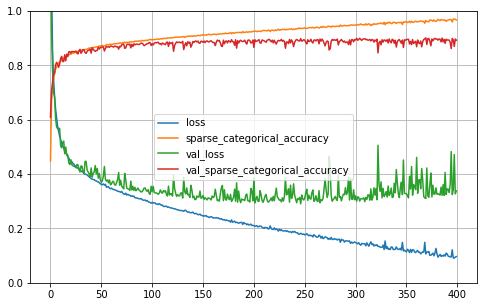

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Okay one thing that I didn't show before is using the `predict()` function. Firstly, I will use predict function on one instance then show that instance with `imshow()`.

In [15]:
X_new = X_test[:1] # getting the first row
y_proba = model.predict(X_new)
y_proba.round(3) # To get rid of scientific notation, I will use round() function.

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.999]], dtype=float32)

Now the model provided us a sparse array which contains the probabilities of each class. I will convert these values to one-hot vector labels. There are a couple of ways of doing that, the one I generally is using `keras.utils.to_categorical() ` function.

In [16]:
tf.keras.utils.to_categorical(np.argmax(y_proba.round(3), axis=1), 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

The algorithm assign the class to ankle boat which the 10th class in our target. Let's use `imshow()` function to show the instance.

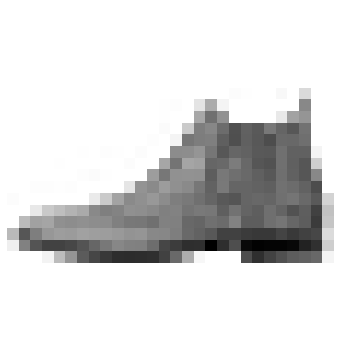

In [18]:
plt.figure(figsize=(10, 6))
for index, image in enumerate(X_new):
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.show()

Instead of one-hot encoding we could also directly see the class by using the code below.

In [106]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9], dtype=int64)

# Functional API

Okay now let's implement Wide and Deep Model architecture. This one was a very interesting architecture for me when I first read about. I am actually a molecular biology student who is interested in neuroscience, therefore, I have a genuine interest for network architectures. I was thinking of using this neural network with regression (It was originally used for recommender system) but I thought I can also use it with Fashion MNIST, let's start.


One of the general idea behind this model is to have different inputs. We will connect some of our input directly to output layers. You can find more about the architecture in the paper. By the way, the paper is really easy to read, I recommend everybody to read it. [The paper](https://arxiv.org/abs/1606.07792)

Additional Note 2: The name Functional API actually comes from the thing that we used the layers here like functions.

In [19]:
input_layer = keras.layers.Input(shape=[28,28])
flatten1=keras.layers.Flatten(input_shape=[28, 28])(input_layer)
hidden_layer1 = keras.layers.Dense(120, activation="relu")(flatten1)
hidden_layer2 = keras.layers.Dense(60, activation="relu")(hidden_layer1)

concatenated_layer = keras.layers.concatenate([flatten1, hidden_layer2])
output = keras.layers.Dense(10,activation="softmax")(concatenated_layer)
model = keras.models.Model(inputs=[input_layer], outputs=[output])

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])


history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid))


Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8170 - sparse_categorical_accuracy: 0.7416 - val_loss: 0.6039 - val_sparse_categorical_accuracy: 0.8046
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5671 - sparse_categorical_accuracy: 0.8124 - val_loss: 0.5189 - val_sparse_categorical_accuracy: 0.8298
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5074 - sparse_categorical_accuracy: 0.8289 - val_loss: 0.4812 - val_sparse_categorical_accuracy: 0.8396
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4735 - sparse_categorical_accuracy: 0.8386 - val_loss: 0.4523 - val_sparse_categorical_accuracy: 0.8518
Epoch 5/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4515 - sparse_categorical_accuracy: 0.8449 - val_loss: 0.4331 - val_sparse_categorical_accuracy: 0.8594
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4332 -

1719/1719 [==============================] - 4s 3ms/step - loss: 0.1414 - sparse_categorical_accuracy: 0.9499 - val_loss: 0.3508 - val_sparse_categorical_accuracy: 0.8924
Epoch 88/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1386 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.3497 - val_sparse_categorical_accuracy: 0.8914
Epoch 89/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1371 - sparse_categorical_accuracy: 0.9513 - val_loss: 0.3571 - val_sparse_categorical_accuracy: 0.8880
Epoch 90/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1362 - sparse_categorical_accuracy: 0.9522 - val_loss: 0.3442 - val_sparse_categorical_accuracy: 0.8956
Epoch 91/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1353 - sparse_categorical_accuracy: 0.9510 - val_loss: 0.3380 - val_sparse_categorical_accuracy: 0.8966
Epoch 92/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1341 - sparse

Let's use `evaluate()` function to look at the model's performance on validation data.

In [20]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 993us/step - loss: 0.3951 - sparse_categorical_accuracy: 0.8856


Okay now we have done an example using functional API, let's now impelement a similar structure of Wide and Deep Neural Network. To do that I will split my training and validation instances.

In [21]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 1:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 1:]

In [22]:
X_train_A.shape

(55000, 5, 28)

Here I will firstly code a callback which will stop our training if the validation accuracy exceeds %90.

In [32]:
class terminate(tf.keras.callbacks.Callback):
     def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_sparse_categorical_accuracy') is not None and logs.get('val_sparse_categorical_accuracy') > 0.90:
            print("\n \n Validation accuracy is reached termination in process...")
            self.model.stop_training = True 

In [33]:
input_wide = keras.layers.Input(shape=X_train_A.shape[1:], name="wide_input")
input_deep = keras.layers.Input(shape=X_train_B.shape[1:], name="deep_input")

flatten_deep=keras.layers.Flatten(input_shape=[26, 28])(input_deep)
hidden_layer1 = keras.layers.Dense(128, activation="relu")(flatten_deep)
hidden_layer2 = keras.layers.Dense(256, activation="relu")(hidden_layer1)
hidden_layer3 = keras.layers.Dense(512, activation="relu")(hidden_layer2)

flatten_wide=keras.layers.Flatten(input_shape=[5, 28])(input_wide)
concat = keras.layers.concatenate([flatten_wide, hidden_layer3])

output = keras.layers.Dense(10, activation="softmax", name="output")(concat)

model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output])

In [35]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),# default learning_rate is 0.01
              metrics=[keras.metrics.sparse_categorical_accuracy])

callbacks = terminate()
history = model.fit((X_train_A, X_train_B), y_train, epochs=50,validation_data=((X_valid_A, X_valid_B), y_valid), callbacks=callbacks)

Epoch 1/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1641 - sparse_categorical_accuracy: 0.9400 - val_loss: 0.3092 - val_sparse_categorical_accuracy: 0.8944
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1626 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.3012 - val_sparse_categorical_accuracy: 0.8972
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1602 - sparse_categorical_accuracy: 0.9413 - val_loss: 0.3510 - val_sparse_categorical_accuracy: 0.8792
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1575 - sparse_categorical_accuracy: 0.9423 - val_loss: 0.3182 - val_sparse_categorical_accuracy: 0.8944
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1555 - sparse_categorical_accuracy: 0.9437 - val_loss: 0.3287 - val_sparse_categorical_accuracy: 0.8900
Epoch 6/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1536 - spars

In [36]:
model.evaluate((X_valid_A, X_valid_B), y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 0.3426 - sparse_categorical_accuracy: 0.9004


[0.34263426065444946, 0.9003999829292297]

In [49]:
keras.backend.clear_session()

## MNIST NUMBERS

Let's also implement one model one MNIST Number dataset.

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

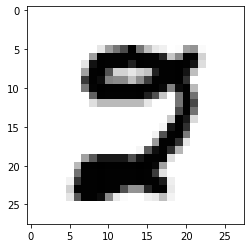

In [6]:
plt.imshow(X_train[13], cmap="binary")

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [11]:
class terminate(tf.keras.callbacks.Callback):
     def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.9860:
            print("\n \n Validation accuracy is reached termination in process...!")
            self.model.stop_training = True 
callbacks = terminate()

In [12]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),callbacks=callbacks)

Epoch 1/100
1692/1719 [============================>.] - ETA: 0s - loss: 2.2061e-05 - accuracy: 1.0000
 
 Validation accuracy is reached termination in process...!
1719/1719 [==============================] - 3s 2ms/step - loss: 2.1952e-05 - accuracy: 1.0000 - val_loss: 0.1032 - val_accuracy: 0.9860


## Time to deal with Regression

Now I will deal with some regression problems. Actually I don't like doing regression stuff with neural networks but I want to do some practice on boston dataset and the covid dataset I previously used in my machine learning repository.

### Boston Dataset

Let's load the dataset.

In [2]:
(x_train, y_train), (x_valid, y_valid)=tf.keras.datasets.boston_housing.load_data(
      path="boston_housing.npz", test_split=0.3, seed=85)

Let's scale our predictors.

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)

In [42]:
class terminate(tf.keras.callbacks.Callback):
     def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_loss') is not None and logs.get('val_loss') < 10:
            print("\n \n Validation accuracy is reached termination in process...!")
            self.model.stop_training = True 
callbacks = terminate()

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid),callbacks=callbacks)


Epoch 1/1000
12/12 [==============================] - 0s 10ms/step - loss: 526.5979 - val_loss: 420.3430
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 206.0028 - val_loss: 67.3629
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 41.6832 - val_loss: 37.8082
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 28.6967 - val_loss: 30.3983
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 24.1727 - val_loss: 29.5884
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 22.2696 - val_loss: 25.2386
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 19.9773 - val_loss: 29.8627
Epoch 8/1000
12/12 [==============================] - 0s 3ms/step - loss: 19.4918 - val_loss: 27.5354
Epoch 9/1000
12/12 [==============================] - 0s 3ms/step - loss: 18.3724 - val_loss: 22.4319
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 16.

Epoch 81/1000
12/12 [==============================] - 0s 2ms/step - loss: 7.8674 - val_loss: 14.7381
Epoch 82/1000
12/12 [==============================] - 0s 2ms/step - loss: 7.4934 - val_loss: 13.3862
Epoch 83/1000
12/12 [==============================] - 0s 2ms/step - loss: 7.2089 - val_loss: 12.8501
Epoch 84/1000
12/12 [==============================] - 0s 2ms/step - loss: 7.1602 - val_loss: 20.4655
Epoch 85/1000
12/12 [==============================] - 0s 2ms/step - loss: 7.7608 - val_loss: 13.9495
Epoch 86/1000
12/12 [==============================] - 0s 2ms/step - loss: 7.3611 - val_loss: 12.8054
Epoch 87/1000
12/12 [==============================] - 0s 2ms/step - loss: 6.9844 - val_loss: 13.9968
Epoch 88/1000
12/12 [==============================] - 0s 2ms/step - loss: 7.2004 - val_loss: 13.6866
Epoch 89/1000
12/12 [==============================] - 0s 2ms/step - loss: 7.2212 - val_loss: 14.7041
Epoch 90/1000
12/12 [==============================] - 0s 2ms/step - loss: 7.5540 

12/12 [==============================] - 0s 3ms/step - loss: 5.7331 - val_loss: 11.5590
Epoch 161/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.5432 - val_loss: 11.9574
Epoch 162/1000
12/12 [==============================] - 0s 2ms/step - loss: 5.7699 - val_loss: 40.4984
Epoch 163/1000
12/12 [==============================] - 0s 2ms/step - loss: 9.3803 - val_loss: 11.7362
Epoch 164/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.7064 - val_loss: 11.6520
Epoch 165/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.5111 - val_loss: 13.5426
Epoch 166/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.7762 - val_loss: 12.1226
Epoch 167/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.5867 - val_loss: 27.0906
Epoch 168/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.4203 - val_loss: 14.1251
Epoch 169/1000
12/12 [==============================] - 0s 2ms/step - loss: 5.6808 - val

12/12 [==============================] - 0s 3ms/step - loss: 5.2050 - val_loss: 10.2405
Epoch 240/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.5733 - val_loss: 11.6650
Epoch 241/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.5009 - val_loss: 10.3144
Epoch 242/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.5220 - val_loss: 10.2692
Epoch 243/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.5238 - val_loss: 10.8509
Epoch 244/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.6233 - val_loss: 10.3432
Epoch 245/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.4797 - val_loss: 10.3943
Epoch 246/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.4476 - val_loss: 14.6344
Epoch 247/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.0556 - val_loss: 11.8129
Epoch 248/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.6399 - val

In [45]:
mse = model.evaluate(X_valid, y_valid)

5/5 [==============================] - 0s 1ms/step - loss: 9.8434


We can also calculate MSE as we did in machine learning repository.

In [46]:
y_pred = model.predict(X_valid)

mean_squared_error(y_valid, y_pred)

9.843425541292964

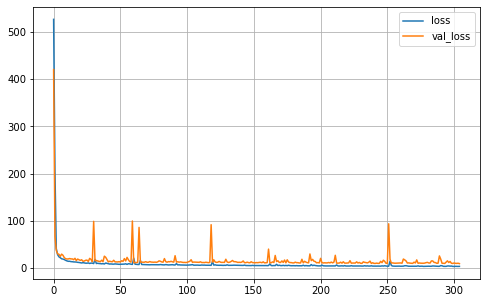

In [58]:
pd.DataFrame(model3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

### Covid Data

I previously worked on this data on my machine learning regression exercises. That's why, I won't describe the steps that I did to get data ready but you can find them in my machine learning repository.

In [4]:
data=pd.read_csv("covidtenmost.csv")
data = data.rename(columns={'Sum_Confirmed': 'sum_Confirmed'})

country_list = data['Country'].unique().tolist()
population_list=["66727461","64842509","46647428","17021347","207833823","11419748","9904896","8829628","60673701",
                "145530082"]

hospital_list=["1257","3042","782","549","6738","165","100","350","1048","5300",
                ]
df_population=pd.DataFrame(population_list,columns=["Population"]) # Data frame of population
df_hospital=pd.DataFrame(hospital_list,columns=["Number of Hospitals"]) # Data frame of Hospitals
df_country=pd.DataFrame(country_list,columns=["Country"])
df_GDP=pd.concat([df_country,df_population["Population"].apply(pd.to_numeric,errors='coerce'),
                  df_hospital["Number of Hospitals"].apply(pd.to_numeric,errors='coerce')],axis = 1) # joining data frames
df_GDP

data_final = data.merge(df_GDP, how='left', on = 'Country')

target=pd.DataFrame(data_final["sum_Deaths"])

data_final.drop(["Date","Lat","Median_CaseFatalityRatio","Median_IncidenceRate","Lon","sum_Deaths"],axis=1,inplace=True)

data_final_ohc=pd.get_dummies(data_final, columns=["Country"], drop_first=True)


In [5]:
data_final.drop("Country",axis=1,inplace=True)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(data_final, target, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)

Time to construct our model.

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(480, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(120, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD())
history = model.fit(X_train_s, y_train, epochs=50, validation_data=(X_valid_s, y_valid))

Epoch 1/50
71/71 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 2/50
71/71 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
71/71 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
71/71 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
71/71 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
71/71 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
71/71 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
71/71 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/50
71/71 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
71/71 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
71/71 [==============================] - 0s 3ms/step - loss: nan - 

Interesting, I don't think I have a problem with implementation but loss return NaN.

In [233]:
model = keras.models.Sequential([
    keras.layers.Dense(480, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(120, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam())
history = model.fit(X_train_s, y_train, epochs=50, validation_data=(X_valid_s, y_valid))

Epoch 1/50
71/71 [==============================] - 0s 5ms/step - loss: 2527705432064.0000 - val_loss: 9432000512.0000
Epoch 2/50
71/71 [==============================] - 0s 4ms/step - loss: 6122108928.0000 - val_loss: 771674112.0000
Epoch 3/50
71/71 [==============================] - 0s 4ms/step - loss: 459246208.0000 - val_loss: 235280336.0000
Epoch 4/50
71/71 [==============================] - 0s 5ms/step - loss: 258118528.0000 - val_loss: 195277456.0000
Epoch 5/50
71/71 [==============================] - 0s 4ms/step - loss: 526405280.0000 - val_loss: 286363328.0000
Epoch 6/50
71/71 [==============================] - 0s 4ms/step - loss: 294265376.0000 - val_loss: 324628928.0000
Epoch 7/50
71/71 [==============================] - 0s 4ms/step - loss: 348583136.0000 - val_loss: 230983856.0000
Epoch 8/50
71/71 [==============================] - 0s 4ms/step - loss: 261625920.0000 - val_loss: 273786272.0000
Epoch 9/50
71/71 [==============================] - 0s 4ms/step - loss: 378700576.

I think there is a problem with gradient, when I used Adam optimization, even though the loss is so high I can get some values. I look for this nan loss problem on the internet. I found a stackoverflow post about that problem and using gradient_clipping solved the problem so it is probably about that gradients are exploiding during the training. [stackoverflow_post](https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(600, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(480, activation="relu"),
    keras.layers.Dense(375, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(clipnorm=1))
history = model.fit(X_train_s, y_train, epochs=100, validation_data=(X_valid_s, y_valid), batch_size=128)

Epoch 1/100
18/18 [==============================] - 0s 19ms/step - loss: 2651757312.0000 - val_loss: 2738427648.0000
Epoch 2/100
18/18 [==============================] - 0s 12ms/step - loss: 2651525376.0000 - val_loss: 2738015488.0000
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 2650873600.0000 - val_loss: 2736983296.0000
Epoch 4/100
18/18 [==============================] - 0s 11ms/step - loss: 2649401088.0000 - val_loss: 2734701568.0000
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 2646205696.0000 - val_loss: 2730118400.0000
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss: 2640062720.0000 - val_loss: 2721582336.0000
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 2628940544.0000 - val_loss: 2706589696.0000
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 2610080512.0000 - val_loss: 2681532928.0000
Epoch 9/100
18/18 [==============================] - 0s 

18/18 [==============================] - 0s 12ms/step - loss: 65464448.0000 - val_loss: 65768288.0000
Epoch 72/100
18/18 [==============================] - 0s 12ms/step - loss: 64443940.0000 - val_loss: 65313064.0000
Epoch 73/100
18/18 [==============================] - 0s 13ms/step - loss: 64420828.0000 - val_loss: 63801212.0000
Epoch 74/100
18/18 [==============================] - 0s 13ms/step - loss: 62734512.0000 - val_loss: 61609844.0000
Epoch 75/100
18/18 [==============================] - 0s 12ms/step - loss: 61993420.0000 - val_loss: 62234820.0000
Epoch 76/100
18/18 [==============================] - 0s 13ms/step - loss: 61531724.0000 - val_loss: 59315612.0000
Epoch 77/100
18/18 [==============================] - 0s 14ms/step - loss: 60469228.0000 - val_loss: 58823160.0000
Epoch 78/100
18/18 [==============================] - 0s 19ms/step - loss: 59381056.0000 - val_loss: 58251756.0000
Epoch 79/100
18/18 [==============================] - 0s 15ms/step - loss: 59863532.0000 - va

Okay the val_loss is too high, let's scale our target variable as well and use the network again. About scaling [link](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)

In [143]:
scaler2 = StandardScaler()
y_train_s = scaler2.fit_transform(y_train)
y_valid_s = scaler2.transform(y_valid)

In [181]:
model = keras.models.Sequential([
    keras.layers.Dense(600, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(480, activation="relu"),
    keras.layers.Dense(375, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD())
history = model.fit(X_train_s, y_train_s, epochs=100, validation_data=(X_valid_s, y_valid_s), batch_size=128)

Epoch 1/100
18/18 [==============================] - 0s 16ms/step - loss: 0.0307 - val_loss: 0.0269
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0225 - val_loss: 0.0228
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0202 - val_loss: 0.0211
Epoch 4/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0192 - val_loss: 0.0202
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0184 - val_loss: 0.0194
Epoch 6/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0178 - val_loss: 0.0188
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0173 - val_loss: 0.0183
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0169 - val_loss: 0.0178
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0165 - val_loss: 0.0174
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0161 - val_loss: 0.0170

18/18 [==============================] - 0s 12ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 85/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 86/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 87/100
18/18 [==============================] - 0s 12ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 88/100
18/18 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 90/100
18/18 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 91/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0022 - val_loss: 0.0024
Epoc

In [182]:
model.evaluate(X_valid_s, y_valid_s)

71/71 [==============================] - 0s 3ms/step - loss: 0.0018


0.0017837422201409936

The performs seems to have a great performance on the regression problem. However, we actually need to see its performance with unscaled features. I will use `inverse_transform` to get back our unscaled values.

In [183]:
y_pred = model.predict(X_train_s)

In [184]:
inversed = scaler2.inverse_transform(y_pred)

In [185]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_valid,inversed)

147180936.2110633

Well looks like my model doesn't perform well on this dataset. In fact we can improve this model but I don't think I will not much need MLP for regression (actually I even used DL for regression just a couple of times) so I don't want to spend much time on it.  A good discussion about Regression with MLP [link](https://stats.stackexchange.com/questions/319349/why-doesnt-deep-learning-work-as-well-in-regression-as-in-classification)

### Instead of that I can also use normalization layer.

In [195]:
from tensorflow.keras import layers

predictor_normalizer = layers.experimental.preprocessing.Normalization(input_shape=data_final.shape[1:], axis=None)

predictor_normalizer.adapt(np.array(data_final))

let's also scale our target feature

In [198]:

scaler_norm = MinMaxScaler()
y_train_norm = scaler_norm.fit_transform(target)

In [209]:
horsepower_model = keras.Sequential([
    predictor_normalizer,
    keras.layers.Dense(300, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1)
])

In [214]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam())
history = model.fit(data_final, y_train_norm, epochs=100, batch_size=128,validation_split = 0.3)

Epoch 1/100
17/17 [==============================] - 1s 37ms/step - loss: 0.0279 - val_loss: 0.0095
Epoch 2/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0278 - val_loss: 0.0111
Epoch 3/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0098
Epoch 4/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0105
Epoch 5/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0106
Epoch 6/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0278 - val_loss: 0.0100
Epoch 7/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0112
Epoch 8/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0278 - val_loss: 0.0098
Epoch 9/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0106
Epoch 10/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0108

17/17 [==============================] - 0s 12ms/step - loss: 0.0278 - val_loss: 0.0104
Epoch 83/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0278 - val_loss: 0.0106
Epoch 84/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0278 - val_loss: 0.0103
Epoch 85/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0105
Epoch 86/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0278 - val_loss: 0.0109
Epoch 87/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0278 - val_loss: 0.0104
Epoch 88/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0278 - val_loss: 0.0107
Epoch 89/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0278 - val_loss: 0.0104
Epoch 90/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0278 - val_loss: 0.0107
Epoch 91/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0278 - val_loss: 0.0105
Epo

In [215]:
ypredict=model.predict(data_final)
inversed = scaler_norm.inverse_transform(ypredict)
mean_squared_error(target,inversed)

1678160361.6851528

There is very good documentation about this normalization layer : [link](https://www.tensorflow.org/tutorials/keras/regression#regression_using_a_dnn_and_multiple_inputs)

## Deep and Wide Neural Network for Regression

Okay now let's use this deep and wide architecture for a regression problem. Here I will go on using boston dataset and fit the model that I have used for Fashion MNIST for a regression problem.

Splitting the training instances.

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)

In [29]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]

Implementing the model

In [30]:
input_wide = keras.layers.Input(shape=X_train_wide.shape[1:], name="wide_model")
input_deep= keras.layers.Input(shape=X_train_deep.shape[1:], name="deep_model")
hidden_layer1 = keras.layers.Dense(30, activation="relu")(input_deep)
hidden_layer2 = keras.layers.Dense(30, activation="relu")(hidden_layer1)
concat_layer = keras.layers.concatenate([input_wide, hidden_layer2])
output = keras.layers.Dense(1, name="output")(concat_layer)
model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output])

In [31]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

In [32]:
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=30,validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/30
12/12 [==============================] - 0s 12ms/step - loss: 531.3338 - val_loss: 464.4315
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 264.6585 - val_loss: 111.0571
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 64.1007 - val_loss: 60.4406
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 42.3278 - val_loss: 45.3553
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 33.5223 - val_loss: 41.2515
Epoch 6/30
12/12 [==============================] - 0s 2ms/step - loss: 29.2972 - val_loss: 33.4458
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 25.9065 - val_loss: 28.8316
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 23.3728 - val_loss: 26.6050
Epoch 9/30
12/12 [==============================] - 0s 4ms/step - loss: 21.8898 - val_loss: 25.5184
Epoch 10/30
12/12 [==============================] - 0s 4ms/step - loss: 20.4155 - val_loss: 24

In [33]:
model.evaluate((X_valid_wide, X_valid_deep), y_valid)

5/5 [==============================] - 0s 999us/step - loss: 15.2005


15.200505256652832

## Sub Class API

Okay We deal with Sequential and Functional API, now It's time to go to third one which provides us the most flexibility. The functional API is declarative, in other words, it is static. We cannot add loops, or basically dynamic behaviors into these two API. On the other hand, Sub Class API provides us that freedom.

In [42]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units1=60,units2=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden_layer1 = keras.layers.Dense(units1, activation=activation)
        self.hidden_layer2 = keras.layers.Dense(units2, activation=activation)
        self.model_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        hidden_layer1 = self.hidden_layer1(input_deep)
        hidden_layer2 = self.hidden_layer2(hidden_layer1)
        concat_layer = keras.layers.concatenate([input_wide, hidden_layer2])
        output = self.model_output(concat_layer)
        return output

model = WideAndDeepModel(60,30,activation="relu")

The basic steps to do
1. Create the layers that you are going to use in your model in constructor.
2. By using the method `call()` perform the computations.

In [43]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=30,validation_data=((X_valid_wide, X_valid_deep), y_valid))



Epoch 1/30
12/12 [==============================] - 0s 10ms/step - loss: 422.9424 - val_loss: 196.9852
Epoch 2/30
12/12 [==============================] - 0s 2ms/step - loss: 79.2062 - val_loss: 56.7003
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 38.5891 - val_loss: 42.3823
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 29.8230 - val_loss: 37.2370
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 25.9101 - val_loss: 33.2582
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 23.2522 - val_loss: 28.4117
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 20.7349 - val_loss: 26.1935
Epoch 8/30
12/12 [==============================] - 0s 2ms/step - loss: 19.4715 - val_loss: 24.2142
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 18.1533 - val_loss: 27.7501
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 17.8728 - val_loss: 22.7

In [44]:
model.evaluate((X_valid_wide, X_valid_deep), y_valid)

5/5 [==============================] - 0s 800us/step - loss: 16.5039


16.503881454467773

## Regression for Covid Dataset Revisited

Okay the regression performance for Covid Dataset was awful. I thought I could perhaps improve it a bit and written the code below. I didn't improve it much, in fact, I could improve it more if I used hyperparameter tuning but I save this subject for another day.

I don't want to scale one_hot_encoding for the column:Country. To skip this column I will use `ColumnTransformer()`

In [13]:
num_pipeline = Pipeline([
         ('polynomial_features',PolynomialFeatures(degree=3)),#4
        ('minmax-scaler', MinMaxScaler()),
        
    ])

preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('mm', num_pipeline , ['sum_Confirmed','sum_Recovered','sum_Active','Population','Number of Hospitals'])
        ])
covid_prepared = preprocessor.fit_transform(data_final_ohc)

In [12]:
covid_prepared.shape

(3011, 30)

Let's split our data.

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(covid_prepared, target, random_state=42)

Normalizing the target:

In [17]:
normalizer=MinMaxScaler()
y_train_norm=normalizer.fit_transform(y_train)
y_valid_norm=normalizer.transform(y_valid)

Implementing the model

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(420, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(60, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_absolute_error", optimizer=keras.optimizers.Adam(lr=3e-4))
history = model.fit(X_train, y_train_norm, epochs=4000, validation_data=(X_valid, y_valid_norm),batch_size=128)

Epoch 1/4000
18/18 [==============================] - 0s 17ms/step - loss: 0.0695 - val_loss: 0.0295
Epoch 2/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0188 - val_loss: 0.0124
Epoch 3/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss: 0.0102
Epoch 4/4000
18/18 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 0.0082
Epoch 5/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 6/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 7/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0085
Epoch 8/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0063
Epoch 9/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0081
Epoch 10/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0077 - val_loss: 0.007

18/18 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 82/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 83/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 84/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 85/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 86/4000
18/18 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 87/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 88/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 89/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 90/4000
18/18 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0034
Epoc

18/18 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 162/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 163/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 164/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 165/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 166/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 167/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 168/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 169/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 170/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.

18/18 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 242/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 243/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 244/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 245/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 246/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 247/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 248/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 249/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 250/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.

18/18 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 322/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 323/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 324/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 325/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 326/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 327/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 328/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 329/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 330/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.

18/18 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 402/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 403/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 404/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 405/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 406/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 407/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 408/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 409/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 410/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.

18/18 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 482/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 483/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 484/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 485/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 486/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 487/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 488/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 489/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 490/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.

18/18 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 562/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 563/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 564/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 565/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 566/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 567/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 568/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 569/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 570/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.

18/18 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 642/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 643/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 644/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 645/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 646/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 647/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 648/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 649/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 650/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.

18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 722/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 723/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 724/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.9235e-04
Epoch 725/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 726/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 727/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 728/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 729/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 730/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss

18/18 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 802/4000
18/18 [==============================] - ETA: 0s - loss: 0.001 - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 803/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 804/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.5321e-04
Epoch 805/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 806/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 807/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 808/4000
18/18 [==============================] - ETA: 0s - loss: 0.001 - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 809/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 810/4000
18/18 [=======================

18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.9710e-04
Epoch 881/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 882/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 883/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 884/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 885/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 886/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 887/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 888/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 889/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss

Epoch 960/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 7.7798e-04
Epoch 961/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 962/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.3183e-04
Epoch 963/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 964/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 965/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 966/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 967/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 968/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 969/4000
18/18 [==============================] - 0s 5ms/step - loss

18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1040/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 1041/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 1042/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 1043/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 1044/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 7.7003e-04
Epoch 1045/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1046/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 1047/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 9.3375e-04
Epoch 1048/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.00

18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 8.6066e-04
Epoch 1118/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 9.1062e-04
Epoch 1119/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 1120/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 1121/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1122/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 1123/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 1124/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 1125/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.1393e-04
Epoch 1126/4000
18/18 [==============================] - 0s 5ms/step - loss: 

18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 9.9328e-04
Epoch 1196/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 1197/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 1198/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1199/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.4131e-04
Epoch 1200/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 1201/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 1202/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 1203/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1204/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.00

18/18 [==============================] - 0s 6ms/step - loss: 9.6970e-04 - val_loss: 9.7173e-04
Epoch 1274/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 1275/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 1276/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.8888e-04
Epoch 1277/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 8.5705e-04
Epoch 1278/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.9786e-04 - val_loss: 0.0010
Epoch 1279/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 8.6073e-04
Epoch 1280/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 7.5605e-04
Epoch 1281/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 1282/4000
18/18 [==============================] - 0s 5

Epoch 1351/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1352/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 1353/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 9.9147e-04
Epoch 1354/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.2261e-04
Epoch 1355/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.6866e-04
Epoch 1356/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 9.2097e-04
Epoch 1357/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 1358/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 8.0111e-04
Epoch 1359/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 1360/4000
18/18 [==============================

18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 9.4393e-04
Epoch 1430/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.9272e-04 - val_loss: 8.2066e-04
Epoch 1431/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 9.5096e-04
Epoch 1432/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 8.9766e-04
Epoch 1433/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 1434/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.0316e-04
Epoch 1435/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.9736e-04 - val_loss: 8.2931e-04
Epoch 1436/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 8.4971e-04
Epoch 1437/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.6412e-04
Epoch 1438/4000
18/18 [==========================

18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1507/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 8.1309e-04
Epoch 1508/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 1509/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 1510/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.8398e-04
Epoch 1511/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 1512/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.6582e-04
Epoch 1513/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 1514/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.5145e-04
Epoch 1515/4000
18/18 [==============================] - 0s 6ms/step - lo

18/18 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 1584/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 1585/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 9.8469e-04
Epoch 1586/4000
18/18 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 1587/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1588/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 1589/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 1590/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.0170e-04
Epoch 1591/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 8.2526e-04
Epoch 1592/4000
18/18 [==============================] - 0s 6ms/step - loss: 

18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 1661/4000
18/18 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 1662/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1663/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 9.1262e-04
Epoch 1664/4000
18/18 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1665/4000
18/18 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 1666/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.3789e-04 - val_loss: 9.5100e-04
Epoch 1667/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.1295e-04 - val_loss: 9.8334e-04
Epoch 1668/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 1669/4000
18/18 [==============================] - 0s 4ms/step 

Epoch 1737/4000
18/18 [==============================] - 0s 7ms/step - loss: 9.6617e-04 - val_loss: 9.9537e-04
Epoch 1738/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.2379e-04 - val_loss: 9.3466e-04
Epoch 1739/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.2410e-04 - val_loss: 0.0012
Epoch 1740/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 1741/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.9551e-04 - val_loss: 8.6900e-04
Epoch 1742/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 1743/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 1744/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.9659e-04 - val_loss: 8.1809e-04
Epoch 1745/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.9217e-04 - val_loss: 9.7173e-04
Epoch 1746/4000
18/18 [======

Epoch 1813/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.1656e-04 - val_loss: 8.9701e-04
Epoch 1814/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 8.1651e-04
Epoch 1815/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.7730e-04 - val_loss: 0.0013
Epoch 1816/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 7.4793e-04
Epoch 1817/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.4585e-04 - val_loss: 7.8130e-04
Epoch 1818/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.6945e-04 - val_loss: 0.0011
Epoch 1819/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.2570e-04
Epoch 1820/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.6377e-04 - val_loss: 9.2186e-04
Epoch 1821/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.2264e-04 - val_loss: 7.6363e-04
Epoch 1822/4000
18/18

Epoch 1889/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 9.4376e-04
Epoch 1890/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 1891/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 1892/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 1893/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 1894/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.6871e-04 - val_loss: 8.5374e-04
Epoch 1895/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.4482e-04 - val_loss: 0.0011
Epoch 1896/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.2184e-04 - val_loss: 7.7048e-04
Epoch 1897/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.3358e-04 - val_loss: 8.1220e-04
Epoch 1898/4000
18/18 [==================

18/18 [==============================] - 0s 6ms/step - loss: 8.3997e-04 - val_loss: 8.6085e-04
Epoch 1966/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 1967/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.1632e-04
Epoch 1968/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.8836e-04
Epoch 1969/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.4608e-04 - val_loss: 7.3865e-04
Epoch 1970/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.9023e-04 - val_loss: 0.0011
Epoch 1971/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 1972/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 9.6975e-04
Epoch 1973/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 8.5782e-04
Epoch 1974/4000
18/18 [==============================

Epoch 2041/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.2455e-04
Epoch 2042/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.5917e-04 - val_loss: 0.0011
Epoch 2043/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.9050e-04 - val_loss: 9.8515e-04
Epoch 2044/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2045/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 7.6695e-04
Epoch 2046/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.8447e-04 - val_loss: 9.3243e-04
Epoch 2047/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.3599e-04 - val_loss: 8.3007e-04
Epoch 2048/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.4912e-04 - val_loss: 0.0010
Epoch 2049/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.8258e-04 - val_loss: 0.0011
Epoch 2050/4000
18/18 [======

Epoch 2116/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.8216e-04 - val_loss: 8.9470e-04
Epoch 2117/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 7.8145e-04
Epoch 2118/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.1880e-04 - val_loss: 7.2787e-04
Epoch 2119/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.7391e-04 - val_loss: 9.3962e-04
Epoch 2120/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.0646e-04 - val_loss: 7.4161e-04
Epoch 2121/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.6520e-04 - val_loss: 7.9460e-04
Epoch 2122/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.3297e-04 - val_loss: 9.6690e-04
Epoch 2123/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2124/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 8.5358e-04
Epoch 2125/4000
1

18/18 [==============================] - 0s 5ms/step - loss: 9.6242e-04 - val_loss: 7.2747e-04
Epoch 2192/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.7845e-04 - val_loss: 9.3844e-04
Epoch 2193/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.2160e-04 - val_loss: 7.5452e-04
Epoch 2194/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 7.8054e-04
Epoch 2195/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.0160e-04 - val_loss: 7.1133e-04
Epoch 2196/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.3848e-04 - val_loss: 8.3345e-04
Epoch 2197/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.4341e-04 - val_loss: 0.0010
Epoch 2198/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.9038e-04 - val_loss: 0.0011
Epoch 2199/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.9420e-04 - val_loss: 0.0012
Epoch 2200/4000
18/18 [==========

18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 7.4351e-04
Epoch 2267/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.8607e-04 - val_loss: 9.0919e-04
Epoch 2268/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.3261e-04 - val_loss: 7.6208e-04
Epoch 2269/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.0374e-04 - val_loss: 0.0012
Epoch 2270/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.3486e-04 - val_loss: 8.2823e-04
Epoch 2271/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.7228e-04 - val_loss: 9.5354e-04
Epoch 2272/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.0847e-04 - val_loss: 0.0013
Epoch 2273/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 8.8905e-04
Epoch 2274/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.8844e-04 - val_loss: 7.7626e-04
Epoch 2275/4000
18/18 [==========

18/18 [==============================] - 0s 5ms/step - loss: 9.0854e-04 - val_loss: 0.0010
Epoch 2342/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.3983e-04 - val_loss: 7.8313e-04
Epoch 2343/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 2344/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.5418e-04 - val_loss: 7.4870e-04
Epoch 2345/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.3861e-04 - val_loss: 8.3260e-04
Epoch 2346/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.0859e-04 - val_loss: 8.1307e-04
Epoch 2347/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.3847e-04 - val_loss: 8.7273e-04
Epoch 2348/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 2349/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 2350/4000
18/18 [======================

18/18 [==============================] - 0s 5ms/step - loss: 7.8296e-04 - val_loss: 0.0010
Epoch 2417/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.8859e-04 - val_loss: 8.7913e-04
Epoch 2418/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.8787e-04 - val_loss: 7.2704e-04
Epoch 2419/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.1249e-04 - val_loss: 8.2444e-04
Epoch 2420/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.9888e-04 - val_loss: 7.1229e-04
Epoch 2421/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.0202e-04 - val_loss: 0.0010
Epoch 2422/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.2833e-04
Epoch 2423/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.5459e-04 - val_loss: 7.5561e-04
Epoch 2424/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8737e-04 - val_loss: 8.3605e-04
Epoch 2425/4000
18/18 [======

18/18 [==============================] - 0s 6ms/step - loss: 9.5333e-04 - val_loss: 0.0011
Epoch 2492/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.8864e-04 - val_loss: 0.0011
Epoch 2493/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.9586e-04 - val_loss: 6.4874e-04
Epoch 2494/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.5266e-04 - val_loss: 9.8715e-04
Epoch 2495/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.2542e-04 - val_loss: 8.0068e-04
Epoch 2496/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.8541e-04 - val_loss: 9.2471e-04
Epoch 2497/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.7706e-04 - val_loss: 0.0016
Epoch 2498/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 9.0016e-04
Epoch 2499/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.5252e-04 - val_loss: 8.5650e-04
Epoch 2500/4000
18/18 [==========

Epoch 2566/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.8888e-04 - val_loss: 7.6721e-04
Epoch 2567/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.7929e-04 - val_loss: 8.5491e-04
Epoch 2568/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.2194e-04 - val_loss: 0.0013
Epoch 2569/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 7.1880e-04
Epoch 2570/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.7998e-04 - val_loss: 7.7220e-04
Epoch 2571/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.0523e-04 - val_loss: 6.7387e-04
Epoch 2572/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.6546e-04 - val_loss: 7.0890e-04
Epoch 2573/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8326e-04 - val_loss: 8.2396e-04
Epoch 2574/4000
18/18 [==============================] - 0s 7ms/step - loss: 7.5580e-04 - val_loss: 6.7722e-04
Epoch 257

Epoch 2641/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8010e-04 - val_loss: 6.8736e-04
Epoch 2642/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.6754e-04 - val_loss: 7.3428e-04
Epoch 2643/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.7045e-04 - val_loss: 8.0432e-04
Epoch 2644/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8828e-04 - val_loss: 7.4404e-04
Epoch 2645/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.1903e-04 - val_loss: 8.8964e-04
Epoch 2646/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.9774e-04 - val_loss: 9.2591e-04
Epoch 2647/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 7.5797e-04
Epoch 2648/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.5081e-04 - val_loss: 0.0012
Epoch 2649/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 2650/4000
1

18/18 [==============================] - 0s 6ms/step - loss: 8.4404e-04 - val_loss: 7.5464e-04
Epoch 2716/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.2484e-04 - val_loss: 7.9706e-04
Epoch 2717/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.8790e-04 - val_loss: 9.8423e-04
Epoch 2718/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.4356e-04 - val_loss: 8.6567e-04
Epoch 2719/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.3345e-04 - val_loss: 9.0076e-04
Epoch 2720/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.9147e-04 - val_loss: 6.5037e-04
Epoch 2721/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8027e-04 - val_loss: 7.5232e-04
Epoch 2722/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.4625e-04 - val_loss: 7.8241e-04
Epoch 2723/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.2041e-04 - val_loss: 9.2839e-04
Epoch 2724/4000
1

Epoch 2790/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.8918e-04 - val_loss: 0.0010
Epoch 2791/4000
18/18 [==============================] - 0s 4ms/step - loss: 9.4825e-04 - val_loss: 8.3733e-04
Epoch 2792/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.4634e-04 - val_loss: 8.8011e-04
Epoch 2793/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.5528e-04 - val_loss: 7.1827e-04
Epoch 2794/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.7155e-04 - val_loss: 8.8053e-04
Epoch 2795/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.4204e-04 - val_loss: 6.9434e-04
Epoch 2796/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.2371e-04 - val_loss: 7.4446e-04
Epoch 2797/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.6730e-04 - val_loss: 6.6268e-04
Epoch 2798/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.0505e-04 - val_loss: 7.6754e-04
Epoch

18/18 [==============================] - 0s 7ms/step - loss: 8.0947e-04 - val_loss: 9.6225e-04
Epoch 2865/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.3899e-04 - val_loss: 7.6531e-04
Epoch 2866/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.8239e-04 - val_loss: 8.0578e-04
Epoch 2867/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.1798e-04 - val_loss: 8.4201e-04
Epoch 2868/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.7986e-04 - val_loss: 7.2259e-04
Epoch 2869/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.7143e-04 - val_loss: 9.0222e-04
Epoch 2870/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.0224e-04 - val_loss: 6.2130e-04
Epoch 2871/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.4788e-04 - val_loss: 8.7249e-04
Epoch 2872/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.4719e-04 - val_loss: 8.5341e-04
Epoch 2873/4000
1

18/18 [==============================] - 0s 5ms/step - loss: 6.9576e-04 - val_loss: 6.7962e-04
Epoch 2939/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.7366e-04 - val_loss: 8.5846e-04
Epoch 2940/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8750e-04 - val_loss: 7.9453e-04
Epoch 2941/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8771e-04 - val_loss: 7.6347e-04
Epoch 2942/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.4040e-04 - val_loss: 8.3401e-04
Epoch 2943/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.6604e-04 - val_loss: 9.9988e-04
Epoch 2944/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.7251e-04 - val_loss: 8.3497e-04
Epoch 2945/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.3829e-04 - val_loss: 8.2486e-04
Epoch 2946/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.2793e-04 - val_loss: 9.6525e-04
Epoch 2947/4000
1

18/18 [==============================] - 0s 6ms/step - loss: 8.7521e-04 - val_loss: 7.9974e-04
Epoch 3013/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.8041e-04 - val_loss: 7.5496e-04
Epoch 3014/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.0048e-04 - val_loss: 7.4915e-04
Epoch 3015/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.9914e-04 - val_loss: 7.9027e-04
Epoch 3016/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8118e-04 - val_loss: 7.7782e-04
Epoch 3017/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.3097e-04 - val_loss: 7.8082e-04
Epoch 3018/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.0747e-04 - val_loss: 0.0010
Epoch 3019/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.4885e-04 - val_loss: 8.7299e-04
Epoch 3020/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8545e-04 - val_loss: 7.9051e-04
Epoch 3021/4000
18/18

18/18 [==============================] - 0s 5ms/step - loss: 7.6497e-04 - val_loss: 9.8567e-04
Epoch 3087/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.2740e-04 - val_loss: 0.0013
Epoch 3088/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3089/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.4281e-04 - val_loss: 0.0012
Epoch 3090/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.5854e-04 - val_loss: 8.8825e-04
Epoch 3091/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.9152e-04 - val_loss: 6.8120e-04
Epoch 3092/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.3867e-04 - val_loss: 0.0010
Epoch 3093/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.0636e-04 - val_loss: 7.6318e-04
Epoch 3094/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.2938e-04 - val_loss: 8.2851e-04
Epoch 3095/4000
18/18 [==============

Epoch 3161/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.1148e-04 - val_loss: 8.7425e-04
Epoch 3162/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3163/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.3702e-04 - val_loss: 6.7437e-04
Epoch 3164/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.1139e-04 - val_loss: 6.4000e-04
Epoch 3165/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.3354e-04 - val_loss: 7.2835e-04
Epoch 3166/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.6027e-04 - val_loss: 9.4925e-04
Epoch 3167/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.0664e-04 - val_loss: 0.0011
Epoch 3168/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.3533e-04 - val_loss: 9.4428e-04
Epoch 3169/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.1494e-04 - val_loss: 8.6326e-04
Epoch 3170/40

18/18 [==============================] - 0s 5ms/step - loss: 9.3298e-04 - val_loss: 7.8129e-04
Epoch 3236/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.0604e-04 - val_loss: 8.5522e-04
Epoch 3237/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.8652e-04 - val_loss: 0.0012
Epoch 3238/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 9.7643e-04
Epoch 3239/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8197e-04 - val_loss: 6.8788e-04
Epoch 3240/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.4051e-04 - val_loss: 7.4738e-04
Epoch 3241/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8234e-04 - val_loss: 7.1170e-04
Epoch 3242/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.6201e-04 - val_loss: 6.7708e-04
Epoch 3243/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.3393e-04 - val_loss: 6.5903e-04
Epoch 3244/4000
18/18 [==

18/18 [==============================] - 0s 7ms/step - loss: 8.1204e-04 - val_loss: 6.9176e-04
Epoch 3310/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.6925e-04 - val_loss: 8.2249e-04
Epoch 3311/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.0790e-04 - val_loss: 8.0611e-04
Epoch 3312/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.6452e-04 - val_loss: 6.8334e-04
Epoch 3313/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.1642e-04 - val_loss: 6.6281e-04
Epoch 3314/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.0482e-04 - val_loss: 7.2853e-04
Epoch 3315/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.1064e-04 - val_loss: 7.1948e-04
Epoch 3316/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.6582e-04 - val_loss: 0.0013
Epoch 3317/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 3318/4000
18/18 [======

Epoch 3384/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.4616e-04 - val_loss: 8.2360e-04
Epoch 3385/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.8432e-04 - val_loss: 7.2018e-04
Epoch 3386/4000
18/18 [==============================] - 0s 5ms/step - loss: 9.4944e-04 - val_loss: 7.9708e-04
Epoch 3387/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.3396e-04 - val_loss: 6.9379e-04
Epoch 3388/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.4805e-04 - val_loss: 7.1302e-04
Epoch 3389/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.7960e-04 - val_loss: 6.3896e-04
Epoch 3390/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.3586e-04 - val_loss: 7.8677e-04
Epoch 3391/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.7127e-04 - val_loss: 7.1924e-04
Epoch 3392/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.7235e-04 - val_loss: 9.3078e-04
E

18/18 [==============================] - 0s 6ms/step - loss: 8.0130e-04 - val_loss: 7.4814e-04
Epoch 3459/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.0395e-04 - val_loss: 6.5468e-04
Epoch 3460/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.0931e-04 - val_loss: 7.5087e-04
Epoch 3461/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.3576e-04 - val_loss: 6.4958e-04
Epoch 3462/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.8620e-04 - val_loss: 0.0014
Epoch 3463/4000
18/18 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 3464/4000
18/18 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 7.7267e-04
Epoch 3465/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.5553e-04 - val_loss: 8.9205e-04
Epoch 3466/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.8919e-04 - val_loss: 7.8839e-04
Epoch 3467/4000
18/18 [==========

18/18 [==============================] - 0s 5ms/step - loss: 8.2488e-04 - val_loss: 7.4824e-04
Epoch 3533/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.5407e-04 - val_loss: 6.4766e-04
Epoch 3534/4000
18/18 [==============================] - 0s 5ms/step - loss: 6.4849e-04 - val_loss: 7.2815e-04
Epoch 3535/4000
18/18 [==============================] - 0s 4ms/step - loss: 9.5670e-04 - val_loss: 7.8030e-04
Epoch 3536/4000
18/18 [==============================] - 0s 5ms/step - loss: 6.9995e-04 - val_loss: 6.2327e-04
Epoch 3537/4000
18/18 [==============================] - 0s 4ms/step - loss: 7.3430e-04 - val_loss: 6.4703e-04
Epoch 3538/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.0976e-04 - val_loss: 6.8838e-04
Epoch 3539/4000
18/18 [==============================] - 0s 4ms/step - loss: 7.7014e-04 - val_loss: 9.6809e-04
Epoch 3540/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.9421e-04 - val_loss: 8.2897e-04
Epoch 3541/4000
1

18/18 [==============================] - 0s 5ms/step - loss: 7.0558e-04 - val_loss: 9.5375e-04
Epoch 3607/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.7514e-04 - val_loss: 6.8068e-04
Epoch 3608/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.7782e-04 - val_loss: 7.6644e-04
Epoch 3609/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.0374e-04 - val_loss: 6.0706e-04
Epoch 3610/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.9338e-04 - val_loss: 6.9501e-04
Epoch 3611/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.7434e-04 - val_loss: 6.2639e-04
Epoch 3612/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.4779e-04 - val_loss: 8.7121e-04
Epoch 3613/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.1055e-04 - val_loss: 8.3854e-04
Epoch 3614/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.7899e-04 - val_loss: 6.2360e-04
Epoch 3615/4000
1

18/18 [==============================] - 0s 5ms/step - loss: 8.5209e-04 - val_loss: 7.1331e-04
Epoch 3681/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.1032e-04 - val_loss: 9.4922e-04
Epoch 3682/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.4210e-04 - val_loss: 6.6483e-04
Epoch 3683/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.2328e-04 - val_loss: 5.5927e-04
Epoch 3684/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.2002e-04 - val_loss: 8.8571e-04
Epoch 3685/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.2413e-04 - val_loss: 6.3463e-04
Epoch 3686/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.0726e-04 - val_loss: 6.2993e-04
Epoch 3687/4000
18/18 [==============================] - 0s 5ms/step - loss: 6.5244e-04 - val_loss: 7.1928e-04
Epoch 3688/4000
18/18 [==============================] - 0s 5ms/step - loss: 6.8262e-04 - val_loss: 6.8660e-04
Epoch 3689/4000
1

18/18 [==============================] - 0s 6ms/step - loss: 7.5069e-04 - val_loss: 8.5469e-04
Epoch 3755/4000
18/18 [==============================] - 0s 6ms/step - loss: 8.4228e-04 - val_loss: 7.3503e-04
Epoch 3756/4000
18/18 [==============================] - 0s 6ms/step - loss: 6.7965e-04 - val_loss: 6.6742e-04
Epoch 3757/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.7978e-04 - val_loss: 6.8261e-04
Epoch 3758/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.0914e-04 - val_loss: 6.2047e-04
Epoch 3759/4000
18/18 [==============================] - 0s 6ms/step - loss: 7.1709e-04 - val_loss: 7.7100e-04
Epoch 3760/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.2750e-04 - val_loss: 7.5937e-04
Epoch 3761/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.6434e-04 - val_loss: 7.4817e-04
Epoch 3762/4000
18/18 [==============================] - 0s 6ms/step - loss: 9.0793e-04 - val_loss: 0.0011
Epoch 3763/4000
18/18

18/18 [==============================] - 0s 5ms/step - loss: 7.7107e-04 - val_loss: 8.0531e-04
Epoch 3829/4000
18/18 [==============================] - 0s 5ms/step - loss: 6.9110e-04 - val_loss: 7.9995e-04
Epoch 3830/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.6430e-04 - val_loss: 7.2108e-04
Epoch 3831/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.2147e-04 - val_loss: 6.9967e-04
Epoch 3832/4000
18/18 [==============================] - 0s 4ms/step - loss: 6.7518e-04 - val_loss: 6.2392e-04
Epoch 3833/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8112e-04 - val_loss: 7.5199e-04
Epoch 3834/4000
18/18 [==============================] - 0s 4ms/step - loss: 6.7124e-04 - val_loss: 8.4033e-04
Epoch 3835/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.8010e-04 - val_loss: 6.8447e-04
Epoch 3836/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.4356e-04 - val_loss: 7.6675e-04
Epoch 3837/4000
1

18/18 [==============================] - 0s 5ms/step - loss: 6.7037e-04 - val_loss: 6.5537e-04
Epoch 3903/4000
18/18 [==============================] - 0s 5ms/step - loss: 6.5070e-04 - val_loss: 6.1640e-04
Epoch 3904/4000
18/18 [==============================] - 0s 5ms/step - loss: 6.0286e-04 - val_loss: 6.5531e-04
Epoch 3905/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.5395e-04 - val_loss: 7.4543e-04
Epoch 3906/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.1046e-04 - val_loss: 7.0455e-04
Epoch 3907/4000
18/18 [==============================] - 0s 4ms/step - loss: 7.6680e-04 - val_loss: 6.7036e-04
Epoch 3908/4000
18/18 [==============================] - 0s 5ms/step - loss: 6.8951e-04 - val_loss: 8.0968e-04
Epoch 3909/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.1928e-04 - val_loss: 7.5690e-04
Epoch 3910/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.0028e-04 - val_loss: 6.6628e-04
Epoch 3911/4000
1

18/18 [==============================] - 0s 5ms/step - loss: 9.6940e-04 - val_loss: 8.5450e-04
Epoch 3977/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.1136e-04 - val_loss: 6.6440e-04
Epoch 3978/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.5644e-04 - val_loss: 5.8980e-04
Epoch 3979/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.6814e-04 - val_loss: 9.7164e-04
Epoch 3980/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.4745e-04 - val_loss: 6.7555e-04
Epoch 3981/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.5877e-04 - val_loss: 0.0010
Epoch 3982/4000
18/18 [==============================] - 0s 5ms/step - loss: 8.2986e-04 - val_loss: 9.0320e-04
Epoch 3983/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.5220e-04 - val_loss: 7.0923e-04
Epoch 3984/4000
18/18 [==============================] - 0s 5ms/step - loss: 7.1242e-04 - val_loss: 6.3326e-04
Epoch 3985/4000
18/18

In [36]:
predict_adam=model.predict(X_valid)

mean_squared_error(y_valid,normalizer.inverse_transform(predict_adam))

202789.428981238

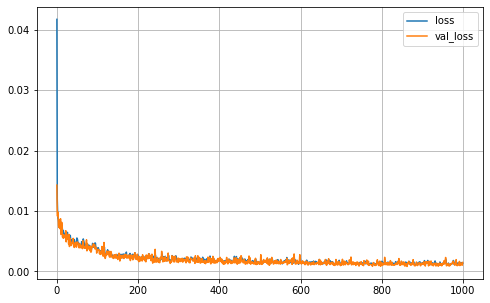

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

## Notes:

Actually there is function called `KerasRegressor()` which I didn't use here but it can be used for implementing neural networks for regression problem. You can find very good examples about that function by clicking the [link](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)

I found a discussion about setting `clipnorm=00.1` while using Adam optimization and tried it. This didn't yield a much better performance but actually improved the covid model a bit. I also add the link about this discussion here [link](https://github.com/fizyr/keras-retinanet/issues/942)